In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df_treino = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [127]:
passengerId = df_teste['PassengerId']

In [7]:
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analisando colunas do DF de teste

In [8]:
df_teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Ajustando coluna SEX para booleano

In [9]:
df_teste['Sex'] = df_teste['Sex'].replace(['female', 'male'], [1, 0])

In [10]:
df_teste['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

Ajustando valores nulos da coluna AGE

In [11]:
df_teste['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [12]:
df_teste['Age'].isnull().sum()

86

In [13]:
media_idade = df_teste['Age'].mean()

In [14]:
df_teste['Age'].fillna(media_idade, inplace=True)

In [15]:
df_teste['Age'].isnull().sum()

0

Checando coluna Fare, para valores discrepantes

In [16]:
df_teste['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

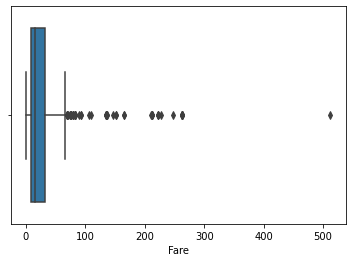

In [17]:
sns.boxplot(x='Fare', data=df_teste)
plt.show()

In [18]:
filtro_linha_fare=df_teste.loc[df_teste['Fare'] == 512.329200]

In [19]:
print(filtro_linha_fare)

     PassengerId  Pclass                                               Name  \
343         1235       1  Cardeza, Mrs. James Warburton Martinez (Charlo...   

     Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
343    1  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C  


considerar como possivel o valor do pagamento da passagem

In [20]:
df_teste['Fare'].isnull().sum()

1

In [21]:
filtro_nulo_fare=df_teste.loc[df_teste['Fare'].isnull()]
print(filtro_nulo_fare)

     PassengerId  Pclass                Name  Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas    0  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [22]:
media_fare = df_teste['Fare'].mean()
print(media_fare)

35.627188489208635


In [23]:
df_teste['Fare'].fillna(media_fare, inplace=True)

In [24]:
df_teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Analise do dataframe de treino

In [25]:
df_treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
df_treino['Sex'] = df_treino['Sex'].replace(['female', 'male'], [1, 0])

In [26]:
df_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

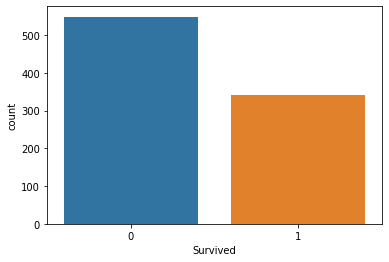

In [27]:
sns.countplot(data= df_treino, x='Survived')

0 = Não sobreviveram/1=sobreviveram

In [28]:
df_treino['Age'].isnull().sum()

177

In [29]:
media_idade_treino = df_teste['Age'].mean()
print(media_idade_treino)

30.272590361445783


In [30]:
df_treino['Age'].fillna(media_idade_treino, inplace=True)

In [31]:
df_treino['Age'].isnull().sum()

0

In [32]:
df_treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
filtro_nulo_embarked=df_treino.loc[df_treino['Embarked'].isnull()]
print(filtro_nulo_embarked)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [34]:
df_treino['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
contagem = df_treino.groupby('Pclass')['Embarked'].value_counts()

In [36]:
print(contagem)

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64


In [37]:
df_treino['Embarked'].fillna('S', inplace=True)

In [38]:
df_treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [39]:
df_treino['Survived'].astype(int)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [65]:
df_treino = df_treino.drop('Name','Cabin','Ticket', axis=1)
df_teste = df_teste.drop('Name','Cabin','Ticket', axis=1)

In [84]:
df_treino = df_treino.drop('Ticket', axis=1)
df_teste = df_teste.drop('Ticket', axis=1)

In [94]:
pclass = pd.get_dummies(df_treino['Pclass'], prefix = "Pclass", drop_first = True)
embarked = pd.get_dummies(df_treino['Embarked'], prefix = 'Embarked', drop_first = True)

pclass_teste = pd.get_dummies(df_teste['Pclass'], prefix = "Pclass", drop_first = True)
embarked_teste = pd.get_dummies(df_teste['Embarked'], prefix = 'Embarked', drop_first = True)

In [98]:
titanic_final = pd.concat([df_treino, pclass, embarked], axis = 1)
titanic_final_teste = pd.concat([df_teste, pclass_teste, embarked_teste], axis = 1)

In [100]:
titanic_final.drop(['Pclass', 'Embarked'], axis=1, inplace=True)
titanic_final_teste.drop(['Pclass', 'Embarked'], axis=1, inplace=True)

In [102]:
X = titanic_final.drop('Survived', axis = 1)
y = titanic_final['Survived']

In [103]:
X_teste = titanic_final_teste

treino de maquina preditiva

In [42]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [110]:
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)    
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return acuracia, acuracia_vc

In [112]:
#random forest

acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y, 10)

print(f"Acurácia: {acc_rf}")
print(f"Acurácia Validação Cruzada: {acc_vc_rf}")

Acurácia: 100.0
Acurácia Validação Cruzada: 81.59


In [113]:
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter=1000), X, y, 10)

print(f"Acurácia: {acc_log}")
print(f"Acurácia Validação Cruzada: {acc_vc_log}")

Acurácia: 80.47
Acurácia Validação Cruzada: 79.91


In [114]:
# K-Nearest Neighbours
acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f"Acurácia: {acc_knn}")
print(f"Acurácia Validação Cruzada: {acc_vc_knn}")

Acurácia: 75.08
Acurácia Validação Cruzada: 49.94


In [115]:
# Gaussian Naive Bayes
acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 10)

print(f"Acurácia: {acc_gaussian}")
print(f"Acurácia Validação Cruzada: {acc_vc_gaussian}")

Acurácia: 79.8
Acurácia Validação Cruzada: 78.9


In [116]:
# Linear Support Vector Machines (SVC)
acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual=False), X, y, 10)

print(f"Acurácia: {acc_linear_svc}")
print(f"Acurácia Validação Cruzada: {acc_vc_linear_svc}")

Acurácia: 80.36
Acurácia Validação Cruzada: 79.46


In [117]:
# Stochastic Gradient Descent
acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 10)

print(f"Acurácia: {acc_sgd}")
print(f"Acurácia Validação Cruzada: {acc_vc_sgd}")

Acurácia: 39.06
Acurácia Validação Cruzada: 50.95


In [118]:
# Decision Tree Classifier
acc_dt, acc_vc_dt = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f"Acurácia: {acc_dt}")
print(f"Acurácia Validação Cruzada: {acc_vc_dt}")

Acurácia: 100.0
Acurácia Validação Cruzada: 72.05


In [119]:
# Gradient Boost Trees
acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f"Acurácia: {acc_gbt}")
print(f"Acurácia Validação Cruzada: {acc_vc_gbt}")

Acurácia: 89.45
Acurácia Validação Cruzada: 80.47


In [120]:
parametros = dict(     
    max_depth = [n for n in range(1, 5)],     
    min_samples_split = [n for n in range(2, 6)], 
    min_samples_leaf = [n for n in range(2, 6)],     
    n_estimators = [n for n in range(10, 50, 10)],
)

In [121]:
gbc = GradientBoostingClassifier()

In [122]:
gbc_cv = GridSearchCV(estimator = gbc, param_grid = parametros, cv = 10) 
gbc_cv.fit(X, y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [123]:
print(f"Melhor parâmetro: {gbc_cv.best_estimator_}")
print(f"Melhor pontuação: {gbc_cv.best_score_}")


Melhor parâmetro: GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, n_estimators=30)
Melhor pontuação: 0.8294631710362047


In [124]:
gradientBoostingClassifier_pred = gbc_cv.predict(X_teste)

In [129]:
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': gradientBoostingClassifier_pred})
kaggle.to_csv('./titanic_gb_prediction.csv', index=False)